In [106]:
import os
from PIL import Image
import pandas as pd

from datasets import load_dataset

In [107]:
dataset_path = "../data/pepe_dataset/train"
files = [
    f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))
]

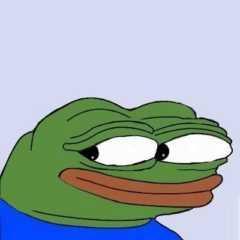

In [108]:
Image.open(os.path.join(dataset_path, files[1]))

In [109]:
metadata = {}
for file in files:
    features = file.split(".")[0].split("_")[1:]
    metadata[file] = features

In [110]:
metadata_df = pd.DataFrame(pd.Series(metadata))
metadata_df = metadata_df.reset_index()
metadata_df.columns = ["file_name", "features"]

In [111]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  2317 non-null   object
 1   features   2317 non-null   object
dtypes: object(2)
memory usage: 36.3+ KB


In [112]:
metadata_df.head()

,file_name,features
0,001570_pepe_walking_night_talking_on_phone.jpg,"[pepe, walking, night, talking, on, phone]"
1,000031_pepe_squished_sideeye.jpg,"[pepe, squished, sideeye]"
2,001799_pepe_spurdo_taking_road_trip.jpg,"[pepe, spurdo, taking, road, trip]"
3,001983_pepe_smug_wearing_blue_tinted_circle_gl...,"[pepe, smug, wearing, blue, tinted, circle, gl..."
4,000664_pepe_copters_4chan_soy.jpg,"[pepe, copters, 4chan, soy]"


In [113]:
dataset_path

'../data/pepe_dataset/train'

In [114]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2317 entries, 0 to 2316
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  2317 non-null   object
 1   features   2317 non-null   object
dtypes: object(2)
memory usage: 36.3+ KB


In [115]:
metadata_df.iloc[1064, 0]

'metadata.csv'

In [116]:
if metadata_df.iloc[1064, 0] == "metadata.csv":
    metadata_df.drop(index=1064, inplace=True)

In [117]:
metadata_df.to_csv(os.path.join(dataset_path, "metadata.csv"), index=False)

In [118]:
hf_dataset = load_dataset(
    "imagefolder", data_dir=dataset_path, data_files="metadata.csv", split="train"
)

Generating train split: 2316 examples [00:00, 66227.21 examples/s]


In [ ]:
hf_dataset.push_to_hub(
    "pepe_dataset",
    private=True,
    token="hidden",
)

Uploading the dataset shards: 100%|██████████| 1/1 [00:05<00:00,  5.93s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/RobertoNeglia/pepe_dataset/commit/ae4f6ba21af4a1a578422f3a86e381dd218dadea', commit_message='Upload dataset', commit_description='', oid='ae4f6ba21af4a1a578422f3a86e381dd218dadea', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/RobertoNeglia/pepe_dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='RobertoNeglia/pepe_dataset'), pr_revision=None, pr_num=None)

In [87]:
dataset = load_dataset(
    "RobertoNeglia/pepe_dataset",
    split="train",
)

Generating train split: 100%|██████████| 2316/2316 [00:00<00:00, 48216.85 examples/s]


In [88]:
cnt = 0
n_features = []
for i in range(len(dataset)):
    n_features.append(len(dataset[i]["features"]))

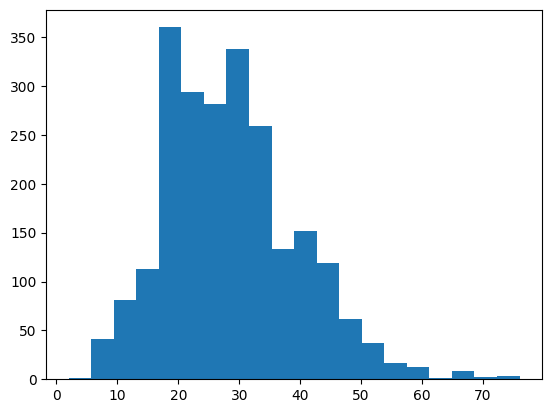

In [93]:
import matplotlib.pyplot as plt

plt.hist(n_features, bins=20)
pass